# Lecture 8

**Scott Prahl**

**4 March 2018**

**Version 1**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ofiber as of

# Figure 13.2

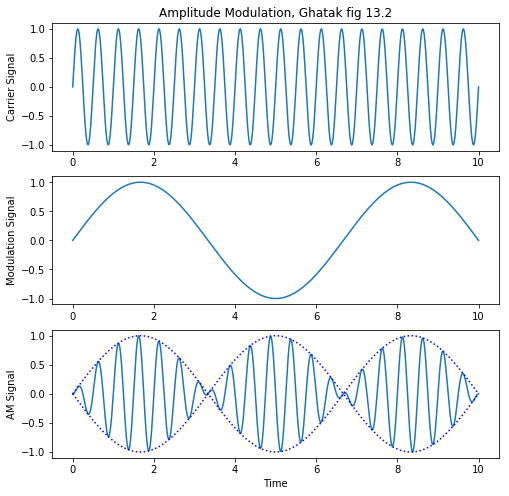

In [3]:
t=np.linspace(0,10,500)
fcarrier = 2*np.pi*2
fmod = 2*np.pi*0.15

plt.subplots(3,1,figsize=(8,8))

plt.subplot(3,1,1)
plt.plot(t, np.sin(fcarrier*t))
plt.title('Amplitude Modulation, Ghatak fig 13.2')
plt.ylabel('Carrier Signal')

plt.subplot(3,1,2)
plt.plot(t, np.sin(fmod*t))
plt.ylabel('Modulation Signal')

plt.subplot(3,1,3)
plt.plot(t, np.sin(fmod*t)*np.sin(fcarrier*t))
plt.plot(t, np.sin(fmod*t),':b')
plt.plot(t, -np.sin(fmod*t),':b')

plt.ylabel('AM Signal')
plt.xlabel('Time')

plt.show()

# Figure 13.3

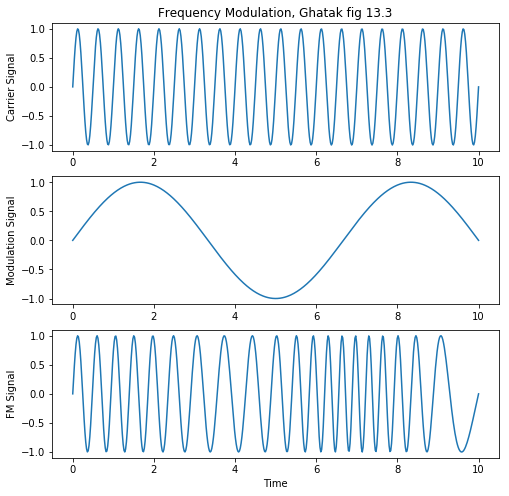

In [4]:
t=np.linspace(0,10,500)
fcarrier = 2*np.pi*2
fmod = 2*np.pi*0.15

plt.subplots(3,1,figsize=(8,8))

plt.subplot(3,1,1)
plt.plot(t, np.sin(fcarrier*t))
plt.title('Frequency Modulation, Ghatak fig 13.3')
plt.ylabel('Carrier Signal')

plt.subplot(3,1,2)
plt.plot(t, np.sin(fmod*t))
plt.ylabel('Modulation Signal')

plt.subplot(3,1,3)
ff = fcarrier + np.sin(fmod*t)
plt.plot(t, np.sin(ff*t))
plt.ylabel('FM Signal')
plt.xlabel('Time')

plt.show()

# Fig 13.4

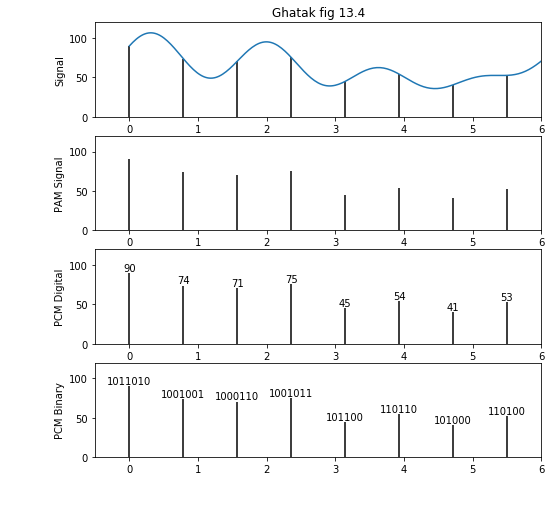

In [5]:
def eqn13_1(omega,t):
    sum  = 4 + np.sin(omega*t) + np.sin(1.5*omega*t)
    sum += np.cos(2*omega*t) + np.cos(3*omega*t) + np.sin(4*omega*t) 
    return 15*sum


t=np.linspace(0,4*np.pi,500)
tpulse = np.linspace(0,4*np.pi,17)
omega=1

plt.subplots(4,1,figsize=(8,8))

plt.subplot(4,1,1)
plt.title('Ghatak fig 13.4')
plt.plot(t, eqn13_1(omega,t))
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
plt.ylim(0,120)

plt.ylabel('Signal')
plt.xlim(-0.5,6)

plt.subplot(4,1,2)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
plt.ylim(0,120)
plt.ylabel('PAM Signal')
plt.xlim(-0.5,6)


plt.subplot(4,1,3)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
for i in range(len(tpulse)):
    t = tpulse[i]
    y = eqn13_1(omega,t)
    plt.annotate("%.0f"%y,(t,y),ha='center',va='bottom')
plt.ylabel('PCM Digital')
plt.ylim(0,120)
plt.xlim(-0.5,6)



plt.subplot(4,1,4)
plt.vlines(tpulse,[0], eqn13_1(omega,tpulse))
for i in range(len(tpulse)):
    t = tpulse[i]
    y = eqn13_1(omega,t)
    s = bin(int(y))
    plt.annotate(s[2:],(t,y),ha='center',va='bottom')
plt.ylabel('PCM Binary')
plt.ylim(0,120)
plt.xlim(-0.5,6)


plt.show()


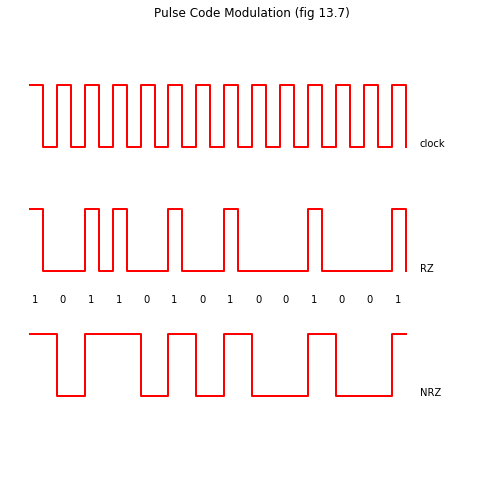

In [6]:
bits = [1,0,1,1,0,1,0,1,0,0,1,0,0,1]
data = np.repeat(bits, 2)
clock = 1 - np.arange(len(data)) % 2
t = 0.5 * np.arange(len(data))

plt.subplots(figsize=(8,8))
plt.step(t, clock + 4, 'r', linewidth = 2, where='post')
plt.step(t, data, 'r', linewidth = 2, where='post')
plt.step(t, data*clock + 2, 'r', linewidth = 2, where='post')

plt.ylim([-1,6])

for tbit, bit in enumerate(bits):
    plt.text(tbit+0.1, 1.5, str(bit))

plt.annotate('clock',xy=(14,4))
plt.annotate('NRZ',xy=(14,0))
plt.annotate('RZ',xy=(14,2))

plt.gca().axis('off')
plt.title('Pulse Code Modulation (fig 13.7)')
plt.xlim(0,16)
plt.show()

## Ghatak Example 13.3

In [6]:
sensitivity       = 0.65         # A/W
optical_signal    = 1e-6         # W
I = optical_signal * sensitivity # A
print("The photo induced current is %.2f uA"%(I*1e6))

Idark = 1e-9
bandwidth = 100e6

ns = of.shot_noise(I,Idark,bandwidth)
print("The shot noise is %.2f nA"%(ns*1e9))

The photo induced current is 0.65 uA
The shot noise is 4.57 nA


## Ghatak Example 13.4

In [7]:
T = 300 # K
Rload = 1000 # Ohms
bandwidth = 100e6

nt = of.thermal_noise(T,Rload,bandwidth)
print("The thermal noise is %.1f nA"%(nt*1e9))

The thermal noise is 40.7 nA


## Ghatak Example 13.5

In [8]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
T = 300              # K
rload = 1000         # Ohms

nep = of.NEP(responsivity,rload,Idark,T)
print("The noise equivalent power is %.1f pW/Hz**0.5"%(nep*1e12))

nep = of.NEP(responsivity,rload,Idark,0)
print("The noise equivalent power is %.1f fW/Hz**0.5 (no thermal noise)"%(nep*1e15))

The noise equivalent power is 6.3 pW/Hz**0.5
The noise equivalent power is 27.5 fW/Hz**0.5 (no thermal noise)


## Ghatak Example 13.6

In [9]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W

I = P * responsivity # A
print('The photoinduced current is %.1f uA'%(I*1e6))

noise1 = of.shot_noise(I,0,BW)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = of.shot_noise(0,Idark,BW)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = of.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)

snr = I**2/noise**2
print('The SNR is %.0f or %.0f dB'%(snr, 10*np.log10(snr)))

The photoinduced current is 0.3 uA
Shot noise due to induced current is 3.2 nA
Shot noise due to    dark current is 0.2 nA
Thermal noise                     is 40.7 nA
The SNR is 63 or 18 dB


## Ghatak Example 13.7

In [10]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W
M = 50
x = 0.0

I = M * P * responsivity # A
print('The photoinduced current is %.1f uA'%(I*1e6))

noise1 = of.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = of.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.0f or %.0f dB'%(snr, 10*np.log10(snr)))

The photoinduced current is 16.2 uA
Shot noise due to induced current is 161.3 nA
Shot noise due to    dark current is 8.9 nA
Thermal noise                     is 40.7 nA
The SNR is 9509 or 40 dB


## Amplification for Maximum SNR

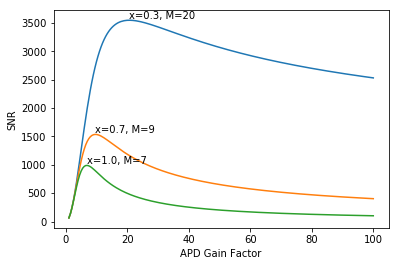

In [39]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W

M = np.linspace(1,100,200)
I = M * P * responsivity # A

x = 0.3
noise1 = of.shot_noise(I,0,BW,M=M,x=x)
noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = of.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

x = 0.7
noise1 = of.shot_noise(I,0,BW,M=M,x=x)
noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = of.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

x = 1.0
noise1 = of.shot_noise(I,0,BW,M=M,x=x)
noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
noise3 = of.thermal_noise(T,rload,BW)
noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
plt.plot(M,snr)
ii=np.argmax(snr)
plt.annotate('x=%.1f, M=%.0f'%(x,M[ii]),xy=(M[ii],snr[ii]),va='bottom',ha='left')

plt.xlabel('APD Gain Factor')
plt.ylabel('SNR')
plt.show()

## Ghatak Example 13.8

In [35]:
responsivity = 0.65  # A/W
Idark = 1e-9         # A
BW = 100e6           # Hz
T = 300              # K
rload = 1000         # Ohms
P = 100e-9           # W
x = 0.3

M = 20
print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = of.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = of.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

print()
M = 1
print('For M=%d'%M)
I = M * P * responsivity # A
print('The photoinduced current is %.3f uA'%(I*1e6))

noise1 = of.shot_noise(I,0,BW,M=M,x=x)
print('Shot noise due to induced current is %.1f nA'%(noise1*1e9))

noise2 = of.shot_noise(0,Idark,BW,M=M,x=x)
print('Shot noise due to    dark current is %.1f nA'%(noise2*1e9))

noise3 = of.thermal_noise(T,rload,BW)
print('Thermal noise                     is %.1f nA'%(noise3*1e9))

noise = np.sqrt(noise1**2+noise2**2+noise3**2)
snr = I**2/noise**2
print('The SNR is %.1f or %.1f dB'%(snr, 10*np.log10(snr)))

For M=20
The photoinduced current is 1.300 uA
Shot noise due to induced current is 45.2 nA
Shot noise due to    dark current is 5.6 nA
Thermal noise                     is 40.7 nA
The SNR is 452.6 or 26.6 dB

For M=1
The photoinduced current is 0.065 uA
Shot noise due to induced current is 1.4 nA
Shot noise due to    dark current is 0.2 nA
Thermal noise                     is 40.7 nA
The SNR is 2.5 or 4.1 dB


## Ghatak Example 13.9

In [14]:

responsivity = 0.45  # A/W
Idark = 0            # A
T = 300              # K
rload = 1000         # Ohms
P = 500e-9           # W
x = 1

I = P * responsivity
Mopt = of.best_APD_gain(I,rload,Idark,x,T)
print('Optimal APD gain is M=%.1f'%Mopt)


Optimal APD gain is M=7.7


## Ghatak Example 13.10

In [15]:
responsivity = 0.60  # A/W
Idark = 0            # A
T = 300              # K
rload = 1000         # Ohms
P = 100e-9           # W
x = 0.7

I = P * responsivity
Mopt = of.best_APD_gain(I,rload,Idark,x,T)
print('Optimal APD gain is M=%.1f'%Mopt)



Optimal APD gain is M=18.0


## Ghatak Fig 13.12

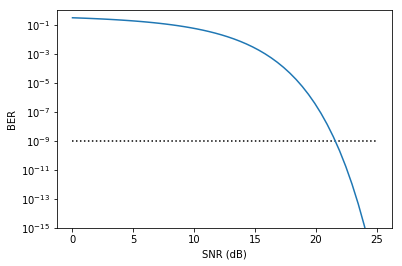

In [51]:
snr = np.linspace(0,25,50)          # dB
ber = of.BER_at_SNR(10**(snr/10))
plt.plot([0,25],[1e-9,1e-9],':k')
plt.semilogy(snr,ber)
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-15,1e0)
plt.show()

## Example 13.11

In [61]:
C = 1e-12          # Farads
T = 300            # K
responsivity = 0.5 # A/W
ber = 1e-9         #
snr = of.SNR_at_BER(ber)

bitrate = 100e6    # bits/second
pmin = of.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 100Mb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

bitrate = 1e9      # bits/second
snr = of.SNR_at_BER(ber)
pmin = of.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

for a bitrate of 100Mb the minimum optical power is 0.39 uW or -34.1 dBm
for a bitrate of 1Gb the minimum optical power is 3.87 uW or -24.1 dBm


## Example 13.12

In [67]:
C = 1e-12               # Farads
T = 300                 # K
responsivity = 0.5      # A/W
ber = 1e-6              #
snr = of.SNR_at_BER(ber)

bitrate = 100e6    # bits/second
pmin = of.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 100Mb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

bitrate = 1e9      # bits/second
snr = of.SNR_at_BER(ber)
pmin = of.thermal_min_power(bitrate,responsivity,C,T,snr)
dbm = 10*np.log10(pmin/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f uW or %.1f dBm'%(pmin*1e6,dbm))

for a bitrate of 100Mb the minimum optical power is 0.31 uW or -35.1 dBm
for a bitrate of 1Gb the minimum optical power is 3.07 uW or -25.1 dBm


## Quantum baseline

In [20]:
bitrate = 1e9      # bits/second
lambda0 = 1550e-9  # m
ber = 1e-9

pquant = of.quantum_min_power(bitrate,ber,lambda0)
dbm = 10*np.log10(pquant/1e-3)
print('for a bitrate of 1Gb the minimum optical power is %.2f nW or %.1f dBm'%(pquant*1e9,dbm))

for a bitrate of 1Gb the minimum optical power is 2.57 nW or -55.9 dBm
